In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv("warmup-data/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#to check any null value is there
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# removed non null data
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


TEST AND TRAIN DATA

target -> housing_median_value
x - > data without target value
y -> data having only target value

In [18]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
Y= data['median_house_value']

In [19]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [21]:
#0.2 -> 20% of data is given to test data
X_train ,X_test ,Y_train , Y_test = train_test_split(X,Y,test_size=0.2) 

In [22]:
train_data= X_train.join(Y_train)

In [33]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15255,-117.26,33.04,18.0,2229.0,346.0,1088.0,352.0,6.3525,NEAR OCEAN,278300.0
5198,-118.27,33.94,39.0,2078.0,561.0,1901.0,504.0,1.1468,<1H OCEAN,96900.0
10717,-117.83,33.65,9.0,638.0,266.0,426.0,234.0,3.7875,<1H OCEAN,187500.0
12769,-121.42,38.62,41.0,1087.0,272.0,462.0,219.0,2.0224,INLAND,64900.0
7700,-118.12,33.97,35.0,708.0,145.0,471.0,153.0,3.2000,<1H OCEAN,197400.0
...,...,...,...,...,...,...,...,...,...,...
10618,-117.82,33.68,4.0,1346.0,213.0,603.0,219.0,8.7974,<1H OCEAN,360600.0
10212,-117.90,33.88,35.0,2062.0,353.0,991.0,357.0,5.2897,<1H OCEAN,230400.0
15952,-122.45,37.72,52.0,1729.0,319.0,890.0,300.0,4.3036,NEAR BAY,261800.0
7932,-118.06,33.84,20.0,5643.0,1231.0,3841.0,1195.0,4.0542,<1H OCEAN,168400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

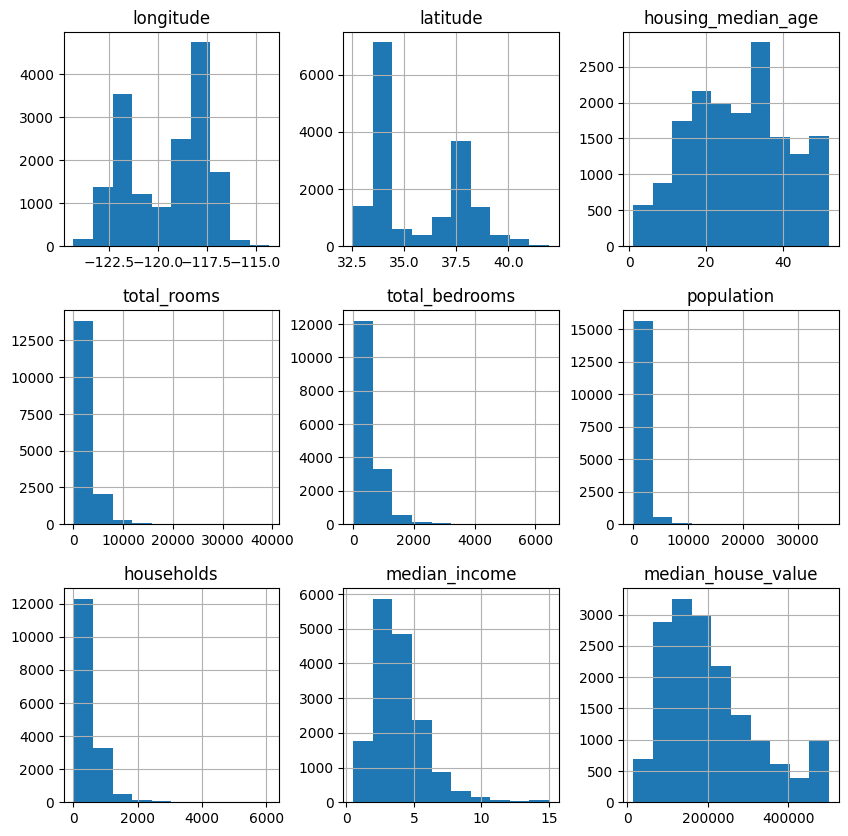

In [34]:
train_data.hist(figsize=(10,10))

<Axes: >

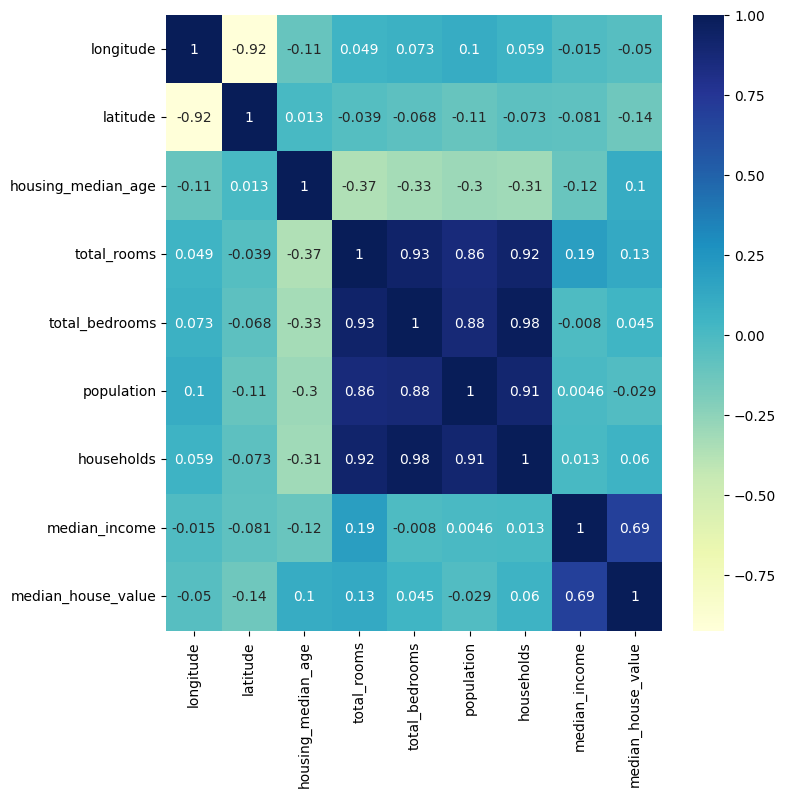

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True , cmap='YlGnBu')
#cmap is selecting colour ,annot- blue meter on right , corr - > correlation of data

In [39]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

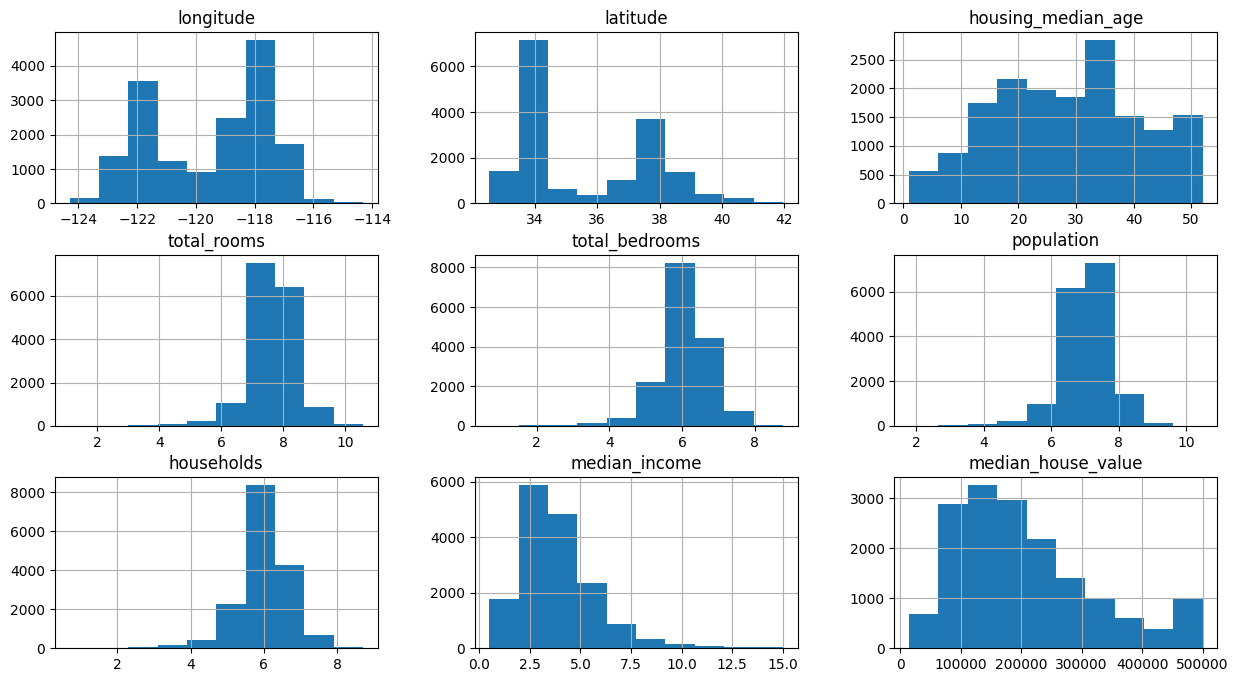

In [40]:
train_data.hist(figsize=(15,8))

Getting ocean proximity value also in plot .. as it is not numeric it is not shown in graph

In [41]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7213
INLAND        5238
NEAR OCEAN    2097
NEAR BAY      1794
ISLAND           4
Name: count, dtype: int64

Before this these lines run to separate ocean prox values
ocean_dummies = pd.get_dummies(train_data['ocean_proximity'])
train_data = pd.concat([train_data, ocean_dummies], axis=1)
train_data = pd.concat([train_data, ocean_dummies], axis=1)

<Axes: >

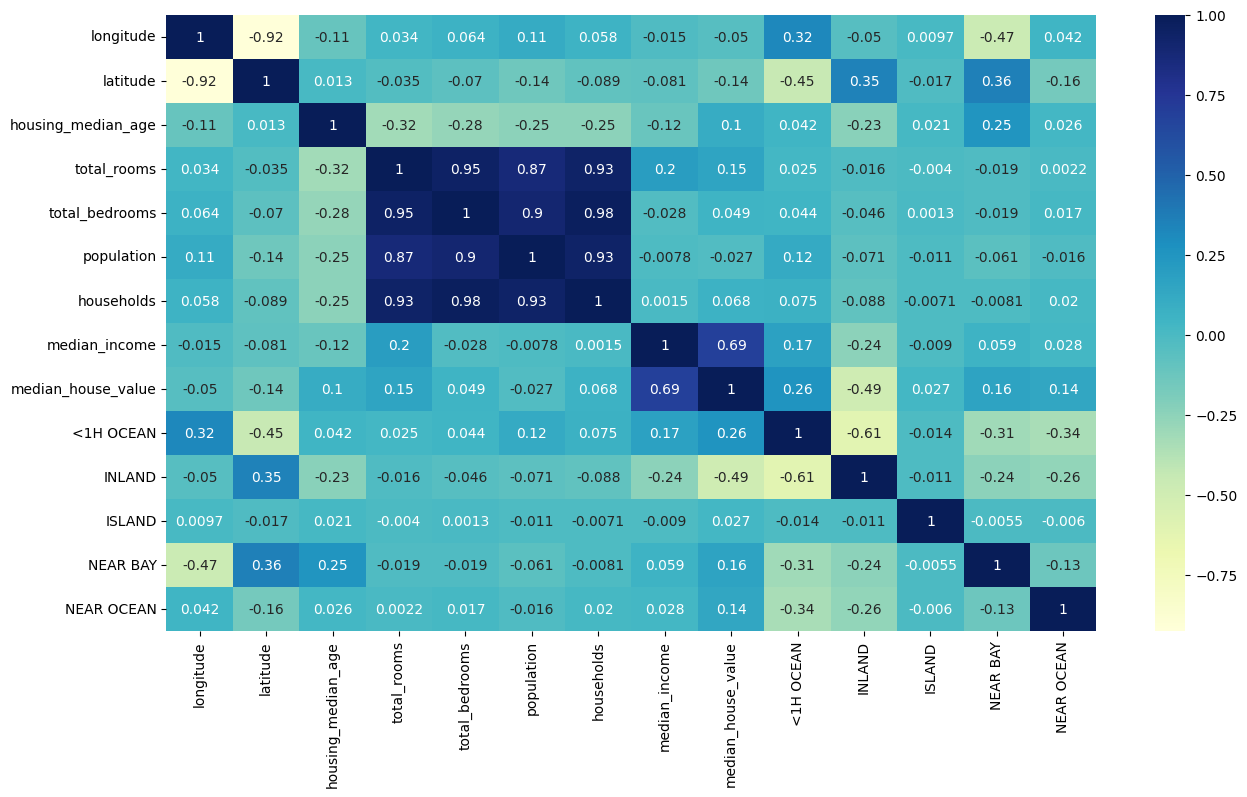

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True , cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

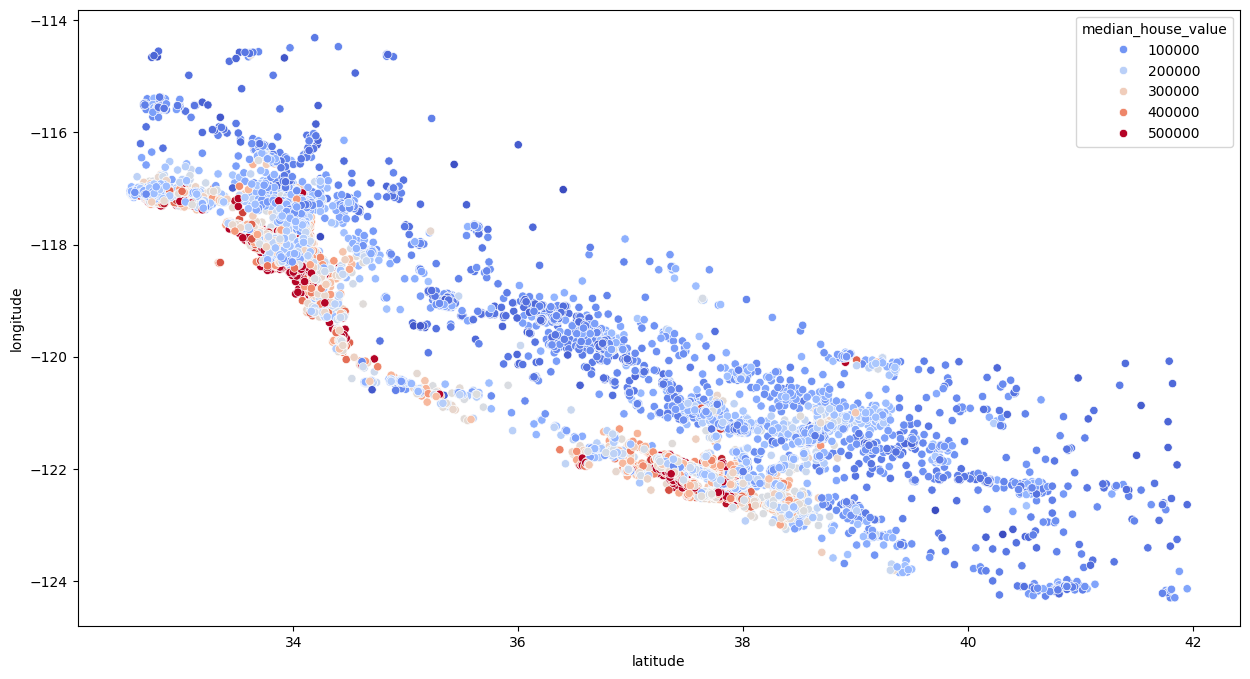

In [68]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [72]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_rooms']=train_data['total_rooms']/train_data['households']


<Axes: >

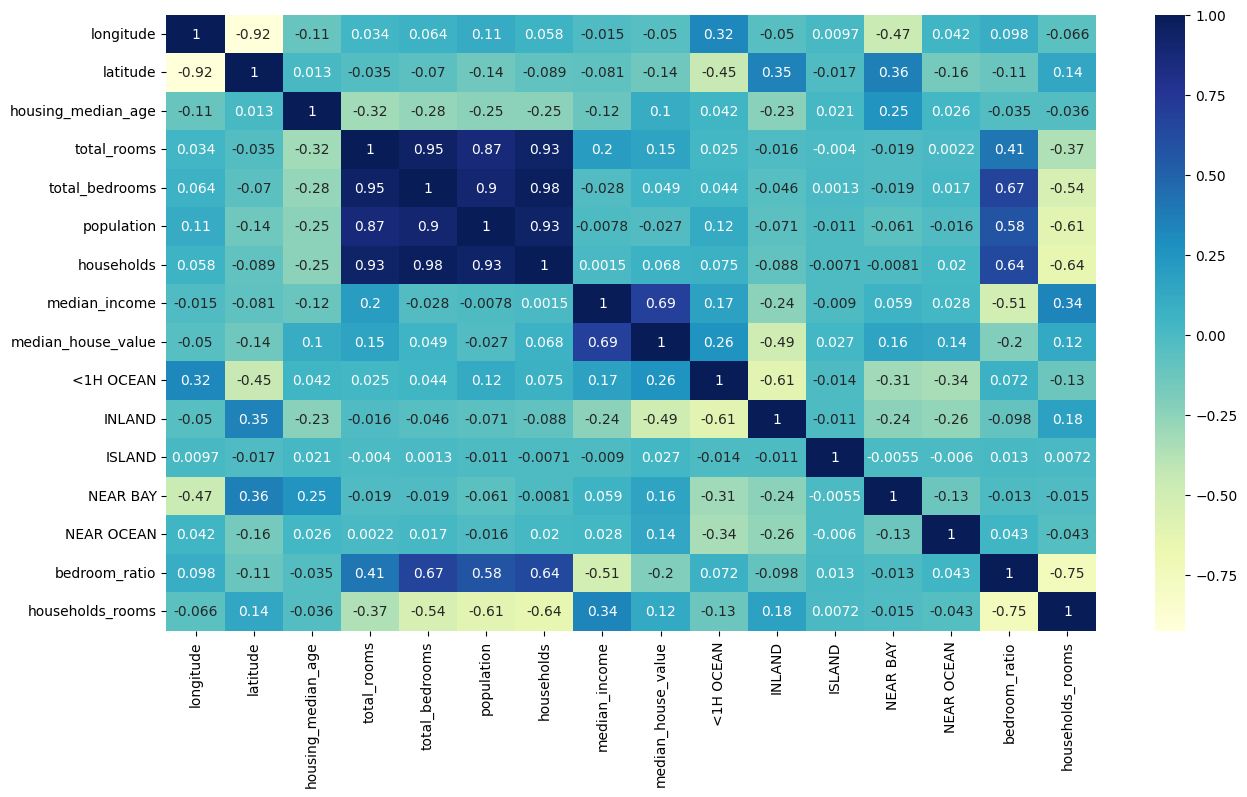

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True , cmap='YlGnBu')

linear regression

Step 1 : import linear reg and split training data

In [91]:
from sklearn.linear_model import LinearRegression

X_train ,Y_train = train_data.drop(['median_house_value'],axis=1) ,train_data['median_house_value']
reg=LinearRegression()
reg.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:
test_data=X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_rooms']=test_data['total_rooms']/test_data['households']


In [92]:
X_test ,Y_test = test_data.drop(['median_house_value'],axis=1) ,test_data['median_house_value']


In [94]:
reg.score(X_test,Y_test)

0.6599477440047882